In [ ]:
## ML Algorithm, Deep Learning, NLP - Chatbots, GenAI & AgenticAI*****
### Data Pipeline - Data collection , cleaning, Analysis - EDA, Modeling, Deployment(Dev, QA,Prod), Monitoring
#### Applications : Delay Prediction, Dynamic Pricing(fare pricing), Maintenance Prediction, Sentiment Analysis,
  #### Chatbots and virtual assistants, Passenger Personalization - 

### Flight Delay Prediction using ML

# Import basic library

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 25)

# importing dataset

In [12]:
dataset = pd.read_excel("airline_dataset.xlsx")
dataset.head(25)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# EDA - dtale

In [17]:
import dtale

In [19]:
dtale.show(dataset)

In [27]:
dataset.isnull().sum()/len(dataset)*100

Airline            0.0
Date_of_Journey    0.0
Source             0.0
Destination        0.0
Route              0.0
Dep_Time           0.0
Arrival_Time       0.0
Duration           0.0
Total_Stops        0.0
Additional_Info    0.0
Price              0.0
dtype: float64

In [25]:
dataset.dropna(inplace=True)

In [29]:
dataset.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [33]:
dataset['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [35]:
dataset['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  jouney_day       10682 non-null  int32 
 12  jouney_month     10682 non-null  int32 
dtypes: int32(2), int64(1), object(10)
memory usage: 1.1+ MB


In [41]:
dataset['jouney_day'] = pd.to_datetime(dataset.Date_of_Journey, format="%d/%m/%Y").dt.day

In [47]:
dataset['jouney_month'] = pd.to_datetime(dataset.Date_of_Journey, format="%d/%m/%Y").dt.month

In [53]:
dataset['jouney_year'] = pd.to_datetime(dataset.Date_of_Journey, format="%d/%m/%Y").dt.year

In [39]:
dataset.Date_of_Journey

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [55]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,jouney_day,jouney_month,jouney_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [57]:
dataset['jouney_year'].value_counts()

jouney_year
2019    10682
Name: count, dtype: int64

In [59]:
dataset.drop(['Date_of_Journey','jouney_year'], axis=1, inplace=True)

In [61]:
dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,jouney_day,jouney_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  jouney_day       10682 non-null  int32 
 11  jouney_month     10682 non-null  int32 
dtypes: int32(2), int64(1), object(9)
memory usage: 1001.4+ KB


In [65]:
dataset['dep_hour'] = pd.to_datetime(dataset['Dep_Time']).dt.hour
dataset['dep_min'] = pd.to_datetime(dataset['Dep_Time']).dt.minute

In [67]:
dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,jouney_day,jouney_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [69]:
dataset.drop(['Dep_Time'], axis=1, inplace=True)

In [71]:
dataset.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,jouney_day,jouney_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [75]:
dataset['arr_hour'] = pd.to_datetime(dataset['Arrival_Time']).dt.hour
dataset['arr_min'] = pd.to_datetime(dataset['Arrival_Time']).dt.minute

In [77]:
dataset.drop(['Arrival_Time'], axis=1, inplace=True)

In [81]:
dataset.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,jouney_day,jouney_month,dep_hour,dep_min,arr_hour,arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   jouney_day       10682 non-null  int32 
 9   jouney_month     10682 non-null  int32 
 10  dep_hour         10682 non-null  int32 
 11  dep_min          10682 non-null  int32 
 12  arr_hour         10682 non-null  int32 
 13  arr_min          10682 non-null  int32 
dtypes: int32(6), int64(1), object(7)
memory usage: 1001.4+ KB


In [85]:
list(dataset['Duration'])

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [87]:
len(list(dataset['Duration']))

10682

In [89]:
duration = list(dataset['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [91]:
dataset['duration_hour'] = duration_hours
dataset['duration_mins'] = duration_mins

In [93]:
dataset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,jouney_day,jouney_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [95]:
dataset.drop(['Duration'], axis=1, inplace=True)

In [97]:
dataset.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,jouney_day,jouney_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [99]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   jouney_day       10682 non-null  int32 
 8   jouney_month     10682 non-null  int32 
 9   dep_hour         10682 non-null  int32 
 10  dep_min          10682 non-null  int32 
 11  arr_hour         10682 non-null  int32 
 12  arr_min          10682 non-null  int32 
 13  duration_hour    10682 non-null  int64 
 14  duration_mins    10682 non-null  int64 
dtypes: int32(6), int64(3), object(6)
memory usage: 1.1+ MB


In [101]:
dataset['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

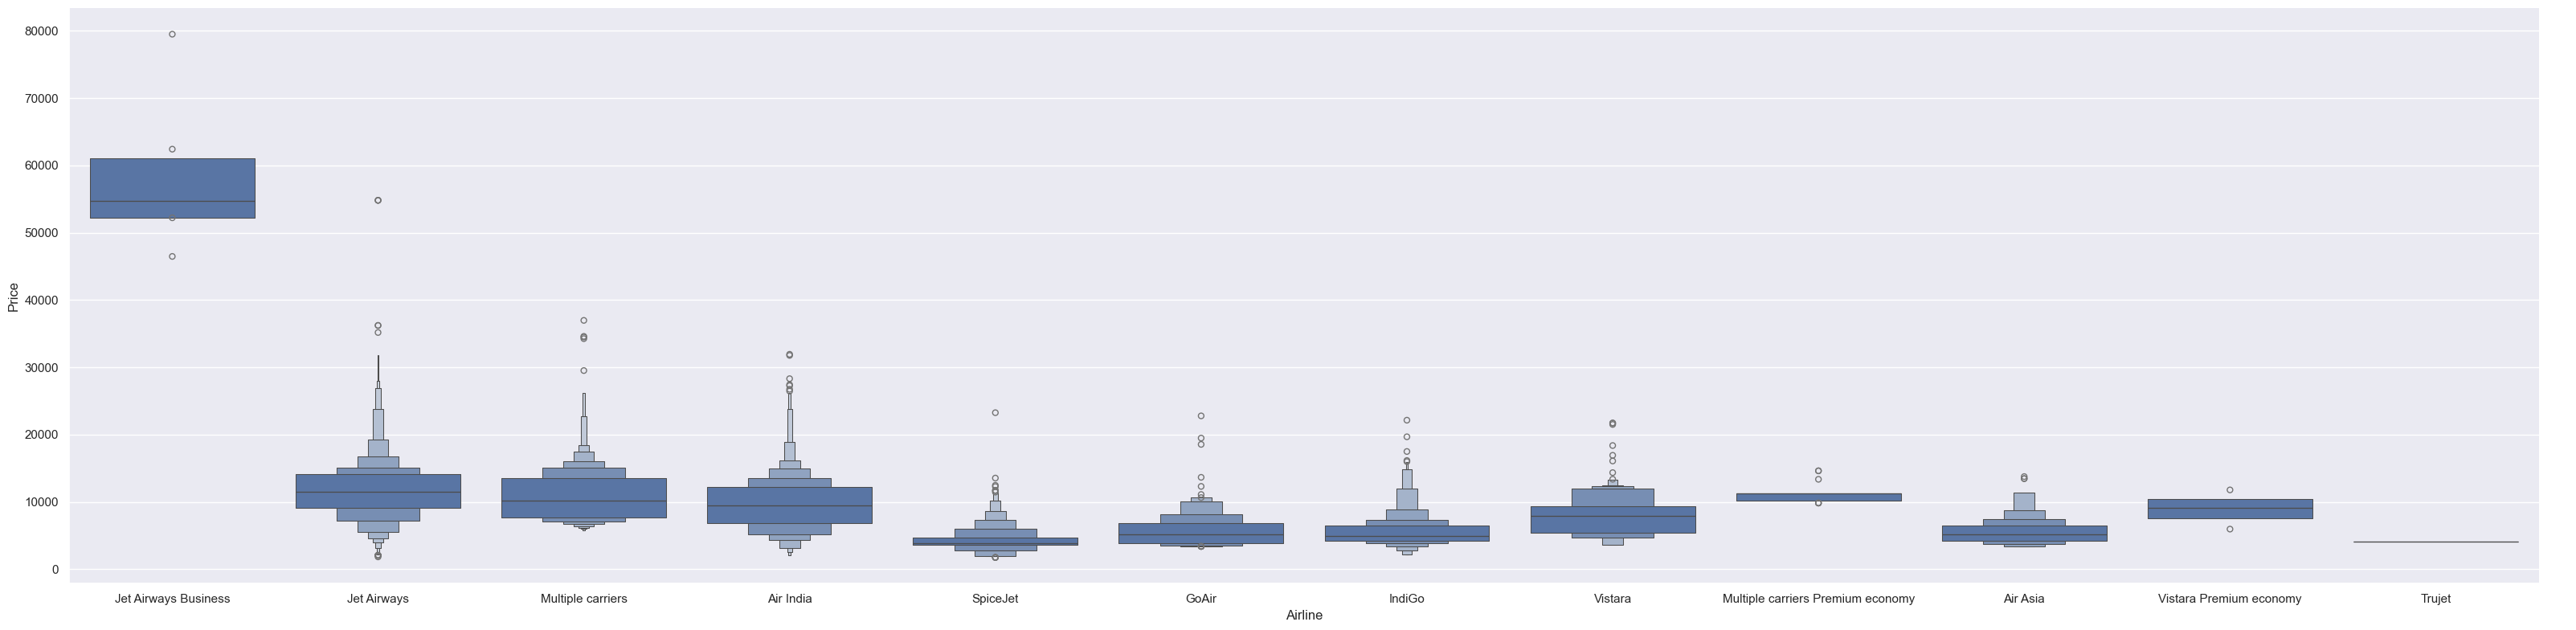

In [103]:
sns.catplot(y='Price', x='Airline', data=dataset.sort_values('Price', ascending=False), kind='boxen', height=8, aspect=4)
plt.show()

In [117]:
Airline1 = dataset[['Airline']]
Airline1 = pd.get_dummies(Airline1, drop_first=True, dtype='int64')
Airline1.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [107]:
dataset['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

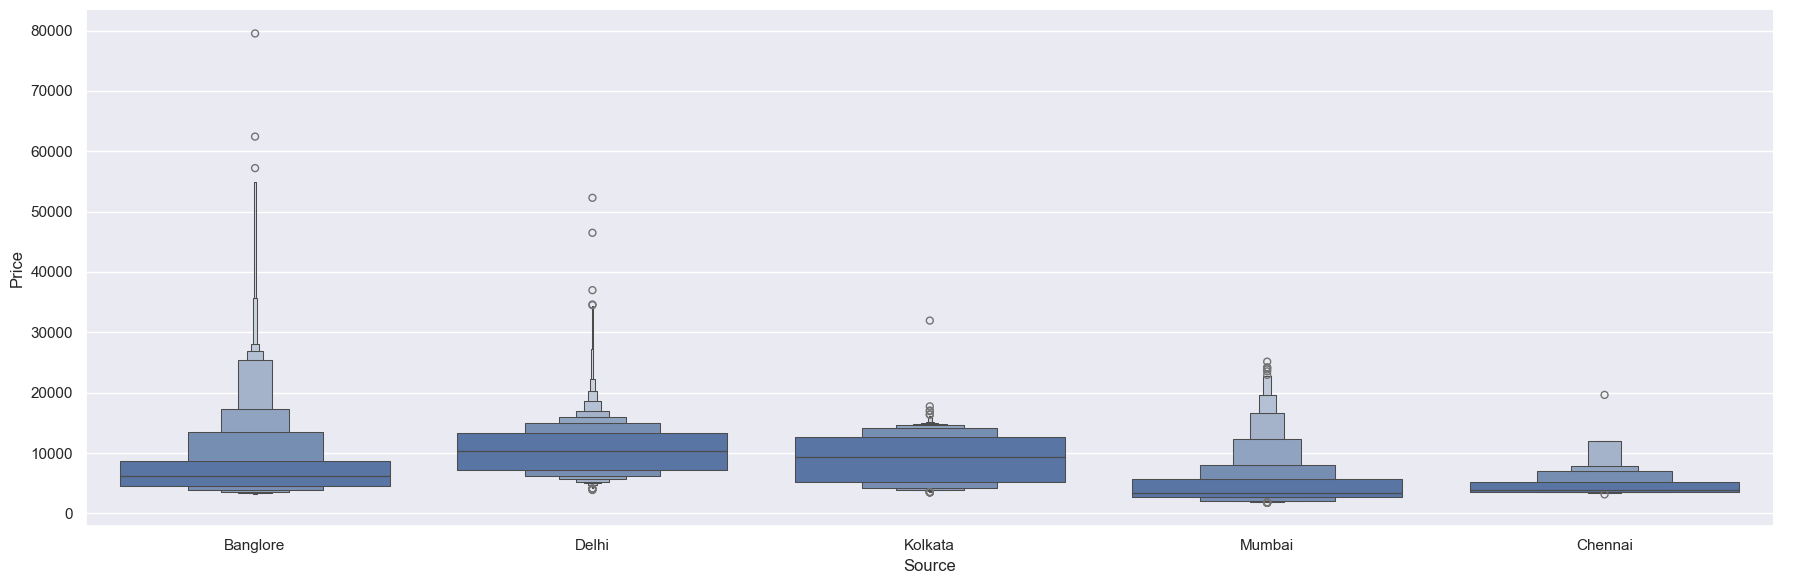

In [109]:
sns.catplot(y='Price', x='Source', data=dataset.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [115]:
Source1 = dataset[['Source']]
Source1 = pd.get_dummies(Source1, drop_first=True, dtype='int64')
Source1.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [119]:
dataset.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,jouney_day,jouney_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [141]:
dataset['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

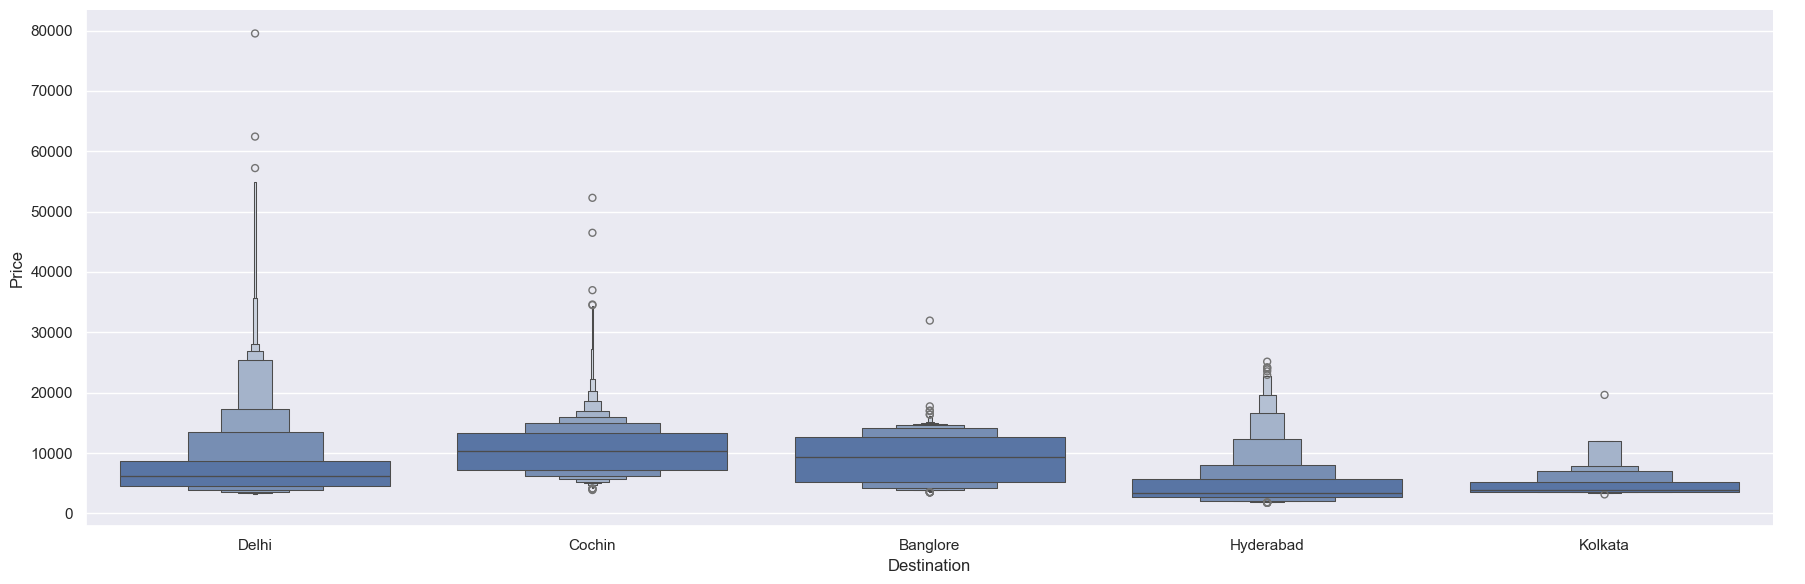

In [143]:
sns.catplot(y='Price', x='Destination', data=dataset.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [139]:
dataset["Destination"] = np.where(dataset["Destination"]=='New Delhi','Delhi',dataset["Destination"])

In [145]:
Destination1 = dataset[['Destination']]
Destination1 = pd.get_dummies(Destination1, drop_first=True, dtype='int64')
Destination1.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [127]:
dataset.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,jouney_day,jouney_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [129]:
dataset['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [131]:
dataset['Route'].nunique()

128

In [147]:
dataset.drop(['Route'], axis=1, inplace=True)

In [133]:
dataset['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [135]:
dataset.replace({"non-stop": 0,"1 stop":1, "2 stops":2,"3 stops":3,"4 stops":4}, inplace=True)

In [137]:
dataset['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

In [149]:
dataset.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,jouney_day,jouney_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_mins
0,IndiGo,Banglore,Delhi,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,7,25


In [153]:
dataset['Additional_Info'].value_counts(normalize=True)

Additional_Info
No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
1 Short layover                 0.000094
Red-eye flight                  0.000094
2 Long layover                  0.000094
Name: proportion, dtype: float64

In [155]:
dataset.drop(['Additional_Info'], axis=1, inplace=True)

In [157]:
dataset.head(2)

,Airline,Source,Destination,Total_Stops,Price,jouney_day,jouney_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_mins
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25


In [159]:
final_dataset = pd.concat([dataset, Airline1,Source1, Destination1], axis=1)

In [161]:
final_dataset.head(2)

,Airline,Source,Destination,Total_Stops,Price,jouney_day,jouney_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [163]:
final_dataset.drop(['Airline','Source','Destination'], axis=1, inplace=True)

In [165]:
final_dataset.head()

,Total_Stops,Price,jouney_day,jouney_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [167]:
# split the data into dep and indep variables
x = final_dataset.drop(['Price'],axis=1)
y = final_dataset['Price']

In [169]:
x.head()

,Total_Stops,jouney_day,jouney_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [171]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

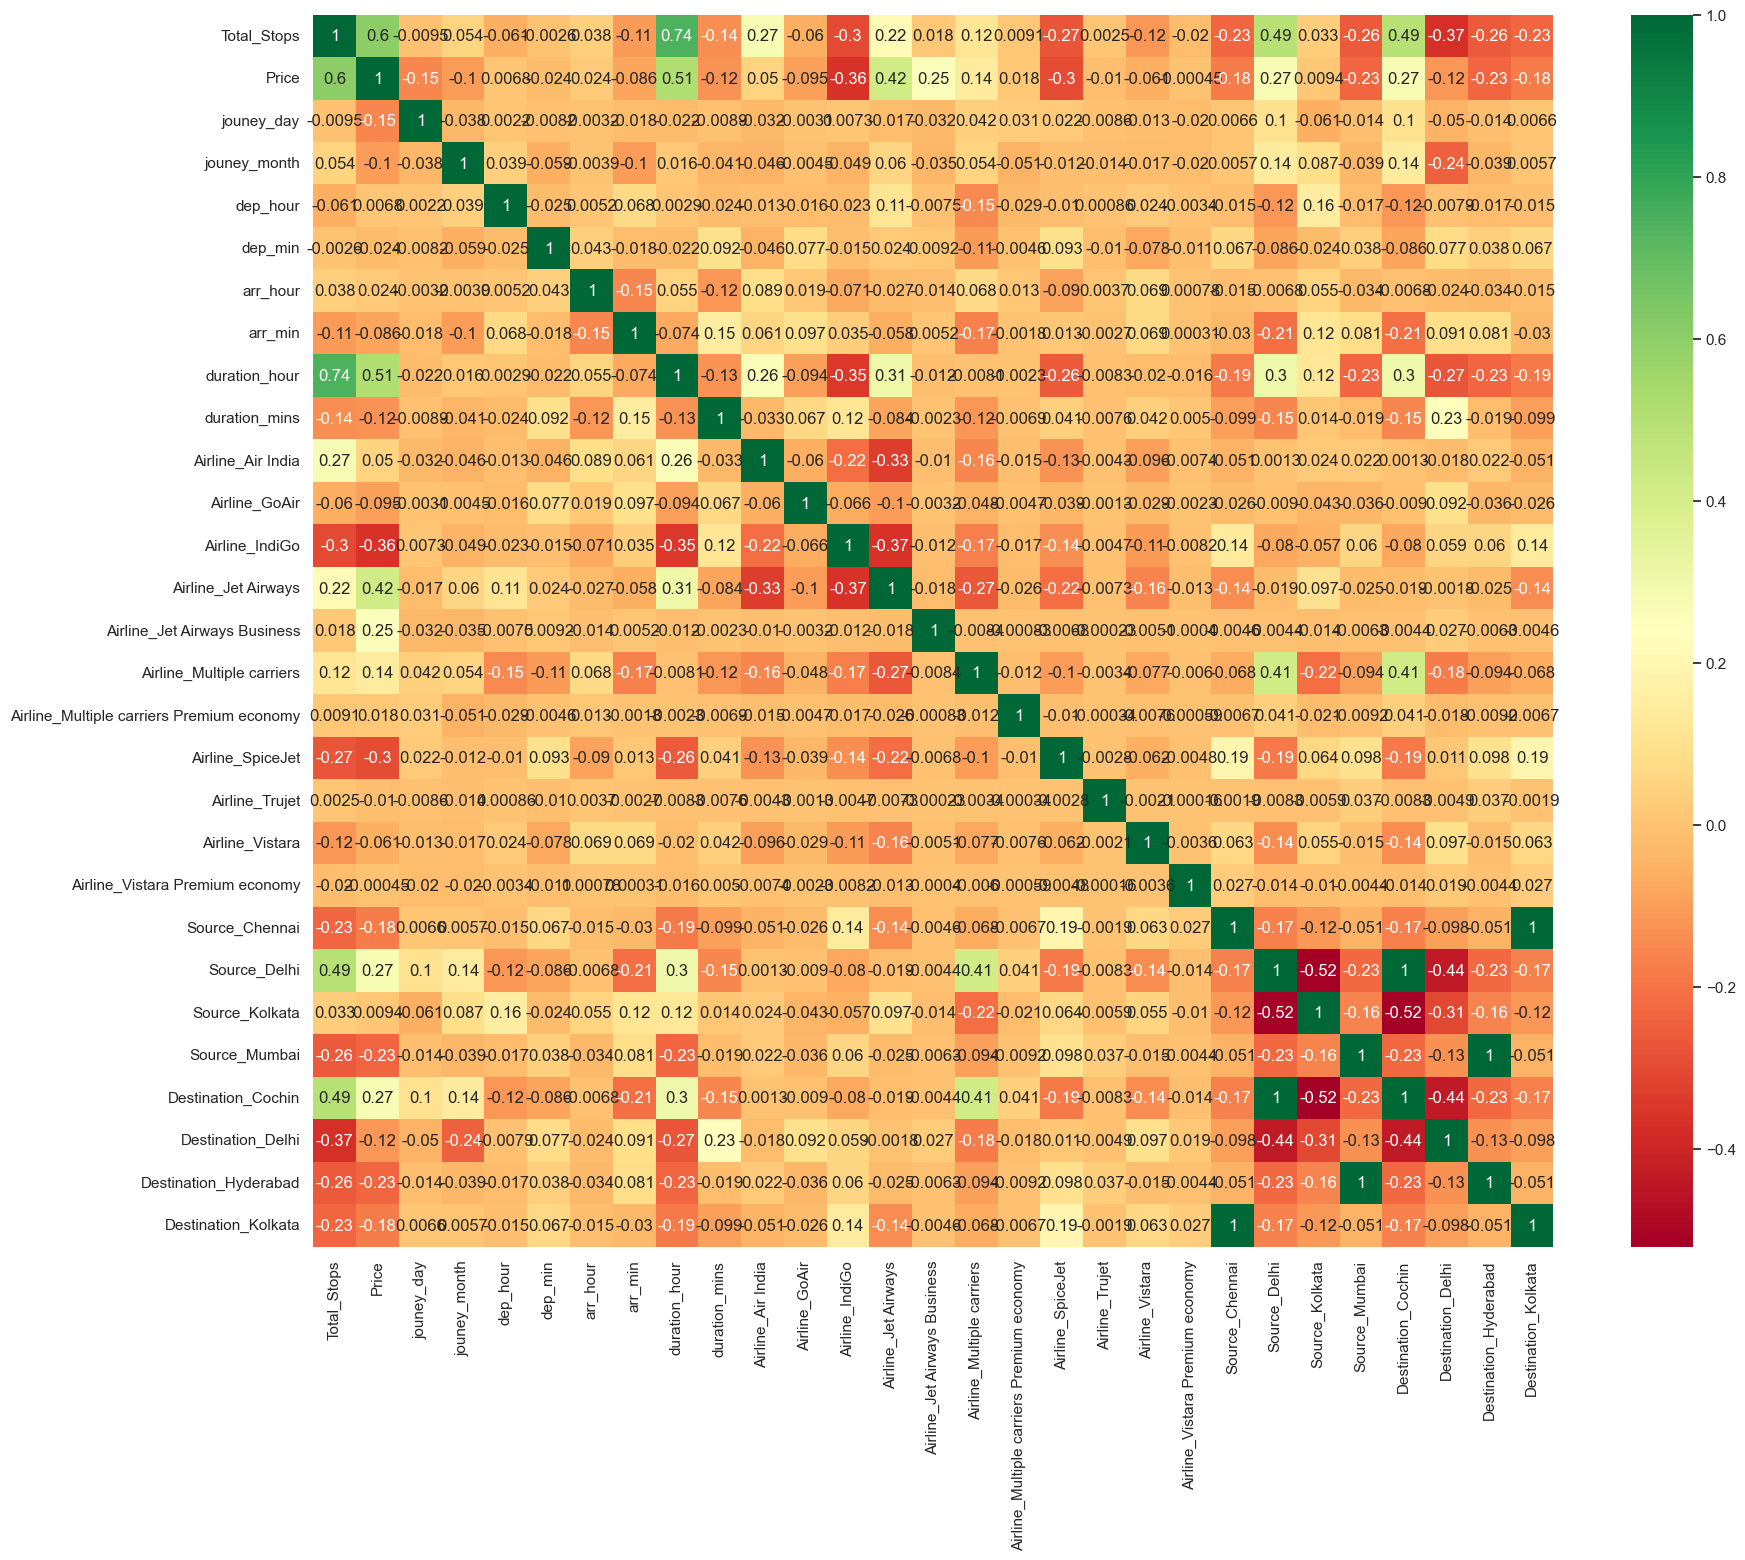

In [177]:
plt.figure(figsize=(20,16))
sns.heatmap(final_dataset.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [179]:
# To check which variable is more significant to impact price - Feature Importance.


In [183]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [185]:
selection.feature_importances_

array([2.21568949e-01, 1.42171078e-01, 5.77360033e-02, 2.37104003e-02,
       2.07389252e-02, 2.84118287e-02, 2.03686078e-02, 1.36860663e-01,
       1.77938332e-02, 9.22505401e-03, 1.99313629e-03, 1.94832672e-02,
       1.38605019e-01, 6.76898933e-02, 1.80490351e-02, 8.39619691e-04,
       5.28117748e-03, 1.01219364e-04, 4.41010413e-03, 6.70711288e-05,
       7.06411076e-04, 1.34302627e-02, 4.89065418e-03, 7.82447216e-03,
       1.03394373e-02, 1.86031835e-02, 8.37375812e-03, 7.26935746e-04])

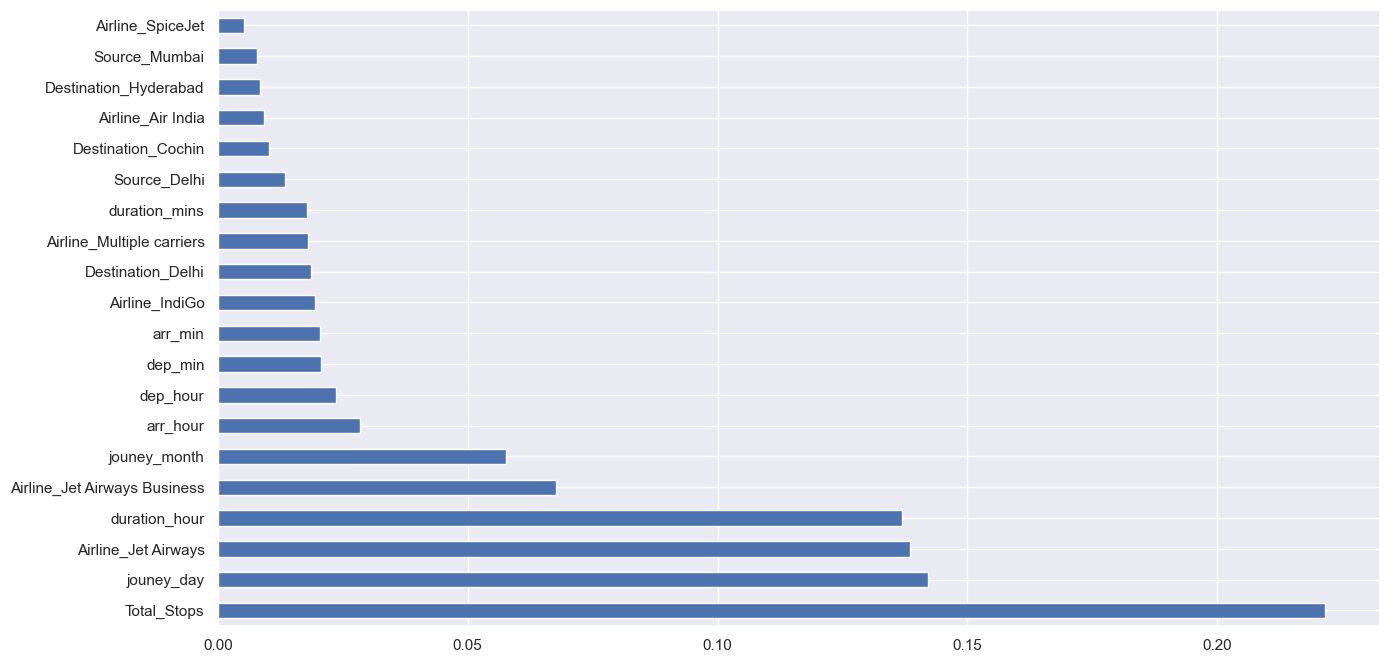

In [189]:
plt.figure(figsize=(15,8))
feature_imp = pd.Series(selection.feature_importances_, index=x.columns)
feature_imp.nlargest(20).plot(kind='barh')
plt.show()

# Building Model - Random Forest Model

In [192]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [194]:
from sklearn.ensemble import RandomForestRegressor
ref_reg = RandomForestRegressor()
ref_reg.fit(x_train, y_train)

RandomForestRegressor()

In [196]:
y_pred_train = ref_reg.predict(x_train)
y_pred_test = ref_reg.predict(x_test)

In [198]:
ref_reg.score(x_train, y_train)

0.9547345852987876

In [200]:
ref_reg.score(x_test, y_test)

0.8005448624747468

In [204]:
from sklearn import metrics

In [206]:
print('MAE :', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE :', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE : 1219.8061916460028
MSE : 4090962.5762999933
RMSE : 2022.612809289013


In [208]:
metrics.r2_score(y_test, y_pred_test)

0.8005448624747468

In [210]:
# RMSE / (max(y) -min(y))
2022.61/(max(y) - min(y))

0.026013272799763353

# HyperParameter Tunning
### RandomizedSearchCV and GridSearchCV

In [214]:
# Save the model to reuse it again while deploy the model
import pickle
file = open('price_prediction.pkl', 'wb')
pickle.dump(ref_reg, file)

In [216]:
model = open('price_prediction.pkl','rb')
rforest = pickle.load(model)

In [218]:
x_test.head()

,Total_Stops,jouney_day,jouney_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
7930,0,9,4,21,5,23,55,2,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8033,1,6,6,20,25,23,35,27,10,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8617,1,6,6,17,0,23,35,6,35,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3836,1,18,3,22,50,9,0,10,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8636,1,27,6,7,35,16,10,8,35,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [220]:
y_prediction = rforest.predict(x_test)

In [222]:
y_prediction

array([ 5109.12      , 11720.43166667, 12934.38833333, ...,
       13649.65416667,  7967.38      ,  4409.85      ])

In [224]:
metrics.r2_score(y_test, y_prediction)

0.8005448624747468